## StyblinskiTang function using Sobolev Training following the paper [Sobolev Training for Neural Networks](https://arxiv.org/pdf/1706.04859.pdf)

In [1]:
# Standard library imports
import os
import sys

# Important directories
code_dir = os.path.dirname(os.getcwd())
deep_cal_dir = os.path.dirname(os.path.dirname(os.getcwd()))
# Allows to import my own module
sys.path.insert(0, code_dir)

from miscellaneous.helpers import StyblinskiTang, StyblinskiTangNN, PlotStyblinskiTang, plot_results
from miscellaneous.dataloader import SobolevDataset
from miscellaneous.models import SobolevRegressor
from miscellaneous.train_sobolev import train_sobolev

from ann.helpers import open_data

import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader

In [2]:
x,y = np.linspace(-5,5,40),np.linspace(-5,5,40)
xx, yy = np.meshgrid(x,y)
real_value = StyblinskiTang(torch.tensor([xx,yy]))
real_value = np.array(real_value,dtype=np.float32)

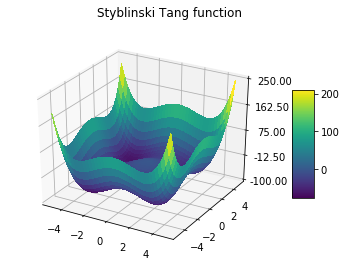

In [3]:
PlotStyblinskiTang(xx, yy, real_value, 'Styblinski Tang function')

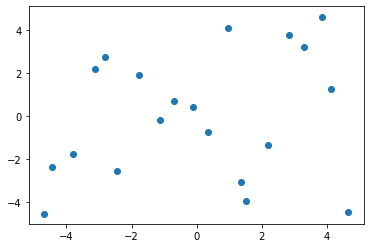

In [31]:
import random 
random.seed(123)
from pyDOE import *
x_min = -5
x_max = 5
y_min = -5
y_max = 5
features = np.random.uniform(low=[x_min,y_min], high=[x_max,y_max], size=(20,2))
ll = lhs(2, samples=20) 
ll = -5 + (5-(-5))/(1-0)*(ll - 0)
from matplotlib import pyplot as plt
plt.scatter(ll[:,0],ll[:,1])

In [32]:
value_ = {'x':ll[:,0], 'y':ll[:,1]}
database = pd.DataFrame(value_)
print(database.tail())
database.to_csv('data/tmp.csv',index=False)

           x         y
15  3.850840  4.612632
16  1.365239 -3.065302
17 -0.117332  0.431655
18  3.306033  3.203782
19 -1.138430 -0.180908


In [33]:
data = open_data('data/tmp.csv')
data = data.to_numpy()
train_data = data[:]
test_data = data[:]

In [34]:
train_dataset =SobolevDataset(train_data)
test_dataset =SobolevDataset(test_data)

In [35]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=5,
                          shuffle=True,
                          num_workers=0)
test_loader = DataLoader(dataset=test_dataset,
                          batch_size=100,
                          shuffle=True,
                          num_workers=0)

In [36]:
model = SobolevRegressor()

In [37]:
out_S, out_sobolev_S = train_sobolev(model,train_loader,test_loader,1.0,nb_epochs=1000,seed=123,save_model_dir='results/tang_tmp.pt',log_df='results/log_df_tmp.csv')

In [38]:
model = SobolevRegressor()
out1, out_sobolev1 = train_sobolev(model,train_loader,test_loader,0.0,nb_epochs=1000,seed=123,save_model_dir='results/tangNN_tmp.pt',log_df='results/log_dfNN_tmp.csv')

In [39]:
x,y = np.arange(-5,5,0.25),np.arange(-5,5,0.25)

reg = SobolevRegressor()
_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
reg.load_state_dict(torch.load('results/tangNN_tmp.pt',map_location=torch.device(_device)))

z = []
for i in x:
    for j in y:
        c = reg(torch.tensor([i,j])).detach().numpy()
        z.append(c)

prediction = np.array(z,dtype=np.float32)        
prediction = np.reshape(prediction,(40,40))

reg = SobolevRegressor()
_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
reg.load_state_dict(torch.load('results/tang_tmp.pt',map_location=torch.device(_device)))

z_S = []
for i in x:
    for j in y:
        c = reg(torch.tensor([i,j])).detach().numpy()
        z_S.append(c)

prediction_S = np.array(z_S,dtype=np.float32)        
prediction_S = np.reshape(prediction_S,(40,40))

In [40]:
out = [prediction,out1]
out_sobolev = [prediction_S,out_S,out_sobolev_S]


In [41]:
plot_results(100,1,'1e-4','tmp', out, out_sobolev)

In [15]:
reg = SobolevRegressor()
_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
reg.load_state_dict(torch.load('results/tang.pt',map_location=torch.device(_device)))

<All keys matched successfully>

In [16]:
x,y = np.arange(-5,5,0.25),np.arange(-5,5,0.25)
xx, yy = np.meshgrid(x,y)
z = []
for i in x:
    for j in y:
        c = reg(torch.tensor([i,j])).detach().numpy()
        z.append(c)

prediction = np.array(z,dtype=np.float32)        
prediction = np.reshape(prediction,(40,40))

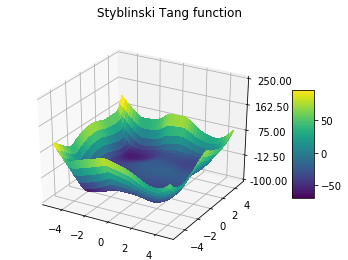

In [17]:
PlotStyblinskiTang(xx, yy, prediction, 'Styblinski Tang Prediction')

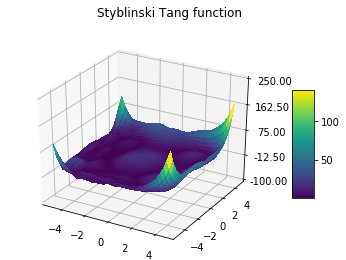

In [18]:
PlotStyblinskiTang(xx,yy,np.abs(prediction - real_value),'prediction error')

In [ ]:
train_sobolev(model,train_loader,test_loader,StyblinskiTangNN,0.0,nb_epochs=5000,seed=123,
              save_model_dir='results/tangNN.pt',log_df='results/log_dfNN.csv')

In [ ]:
reg = SobolevRegressor()
_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
reg.load_state_dict(torch.load('results/tangNN.pt',map_location=torch.device(_device)))

In [ ]:
x,y = np.linspace(-5,5,100),np.linspace(-5,5,100)
xx, yy = np.meshgrid(x,y)
z = []
for i in x:
    for j in y:
        c = reg(torch.tensor([i,j])).detach().numpy()
        z.append(c)

prediction = np.array(z,dtype=np.float32)        
prediction = np.reshape(prediction,(100,100))

In [ ]:
PlotStyblinskiTang(xx, yy, prediction, 'Styblinski Tang Prediction NN')